In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from importlib import reload

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

import wrangle as w
import explore as e

In [2]:
# plotting defaults
plt.rc('figure', figsize=(20, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
records = w.get_health_data('Record')

In [4]:
records = w.clean_records_list(records)

In [5]:
records = w.records_list_time_zone_fun(records)

In [27]:
records.activity_type.value_counts()

StepCount                         650299
ActiveEnergyBurned                529598
DistanceWalkingRunning            302735
BasalEnergyBurned                 270744
HeartRate                         237855
WalkingSpeed                       38954
WalkingStepLength                  38951
AppleExerciseTime                  37130
WalkingDoubleSupportPercentage     31306
AppleStandTime                     28282
WalkingAsymmetryPercentage         18394
FlightsClimbed                     15171
EnvironmentalAudioExposure         14127
HeadphoneAudioExposure             11075
AppleStandHour                      7273
RespiratoryRate                     5656
SleepAnalysis                       5070
OxygenSaturation                    3239
HeartRateVariabilitySDNN            2587
StairDescentSpeed                   2235
StairAscentSpeed                    1654
DietaryEnergyConsumed               1341
DietaryCarbohydrates                1283
DietaryFatTotal                     1256
DietarySugar    

In [98]:
reload(w)

<module 'wrangle' from '/Users/fostermark/codeup-data-science/my_apple_health/wrangle.py'>

In [99]:
daily_info = w.get_daily_info(records)

In [95]:
daily_info['2022'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 342 entries, 2022-01-01 to 2022-12-08
Freq: D
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   steps            342 non-null    float64
 1   distance_walked  342 non-null    float64
 2   weight           342 non-null    float64
 3   resting_hr       342 non-null    float64
 4   exercise_time    342 non-null    float64
 5   calorie_intake   94 non-null     float64
 6   stand_time       342 non-null    float64
 7   VO2Max           342 non-null    float64
 8   walking_hr       335 non-null    float64
 9   sleep_hrs        341 non-null    float64
dtypes: float64(10)
memory usage: 29.4 KB


In [66]:
cols = list(daily_info.columns)
cols.remove('sleep_time')

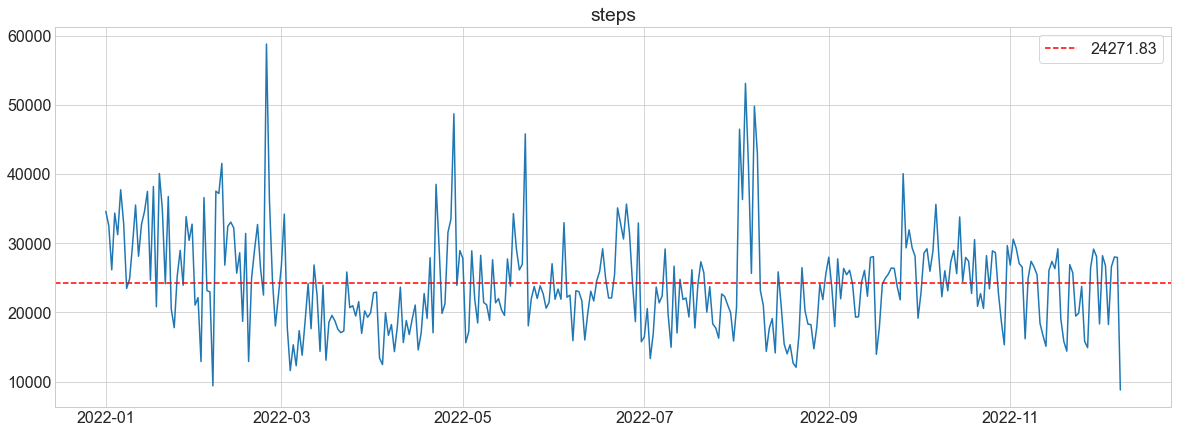

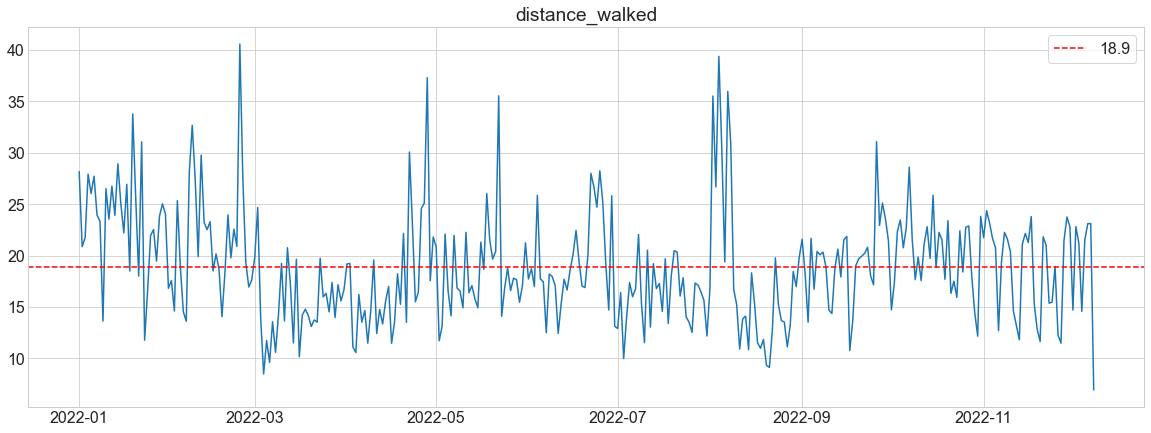

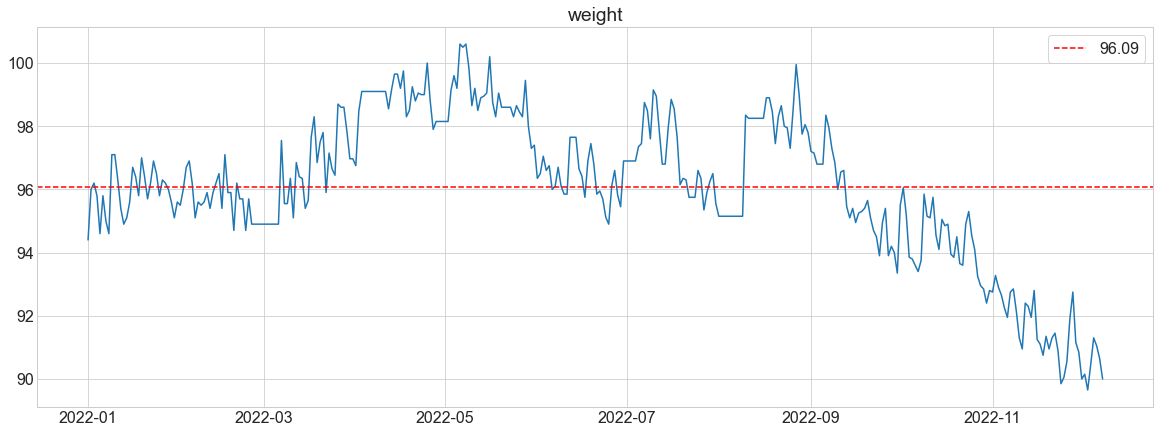

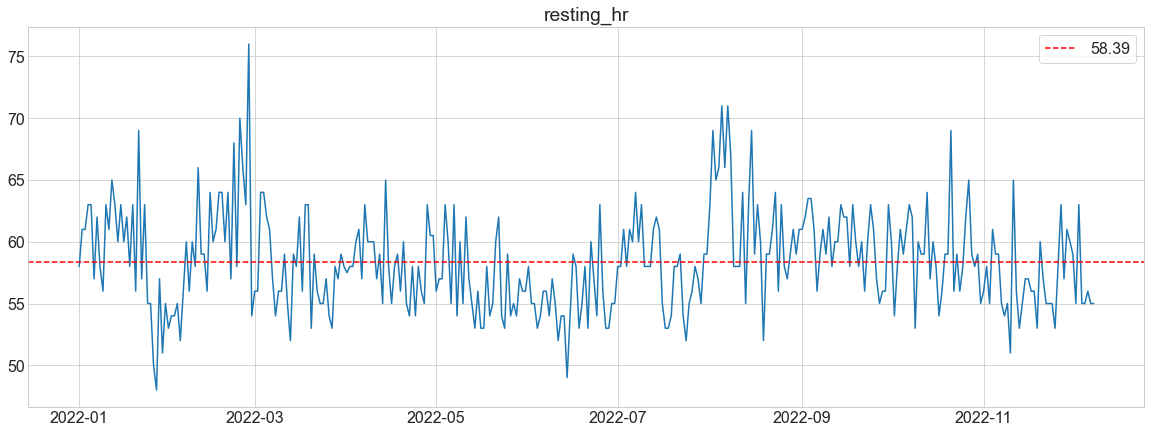

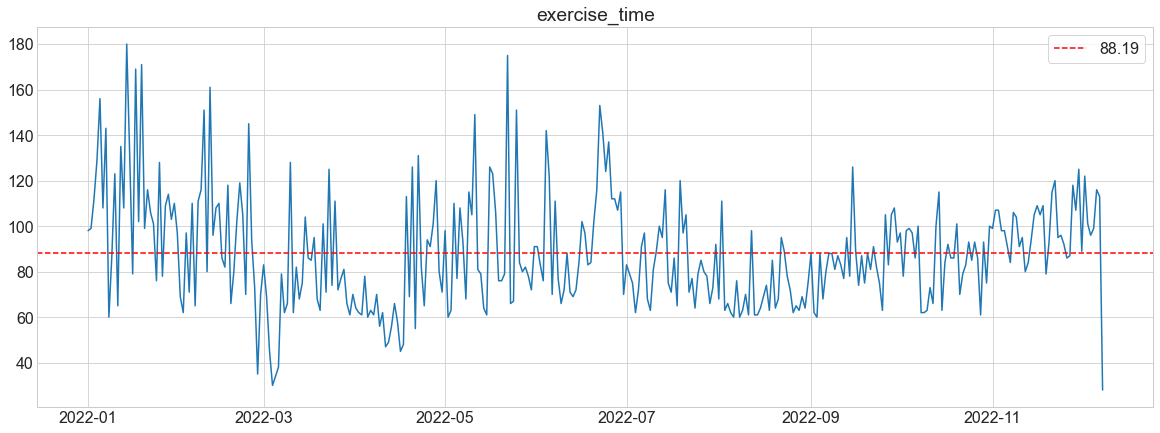

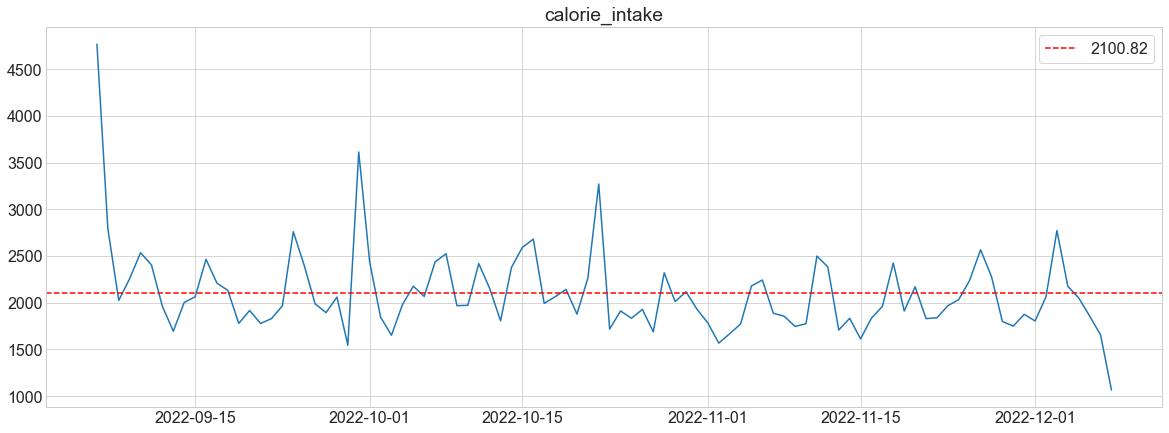

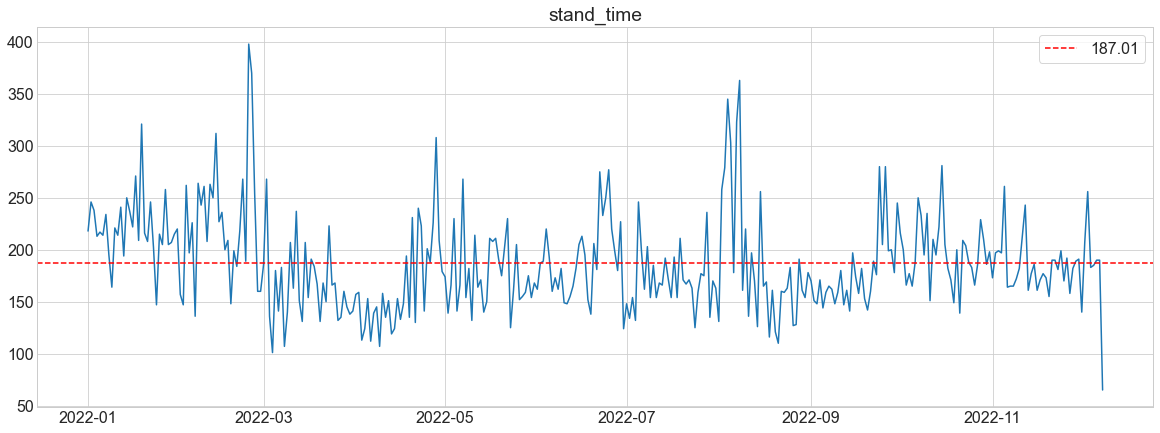

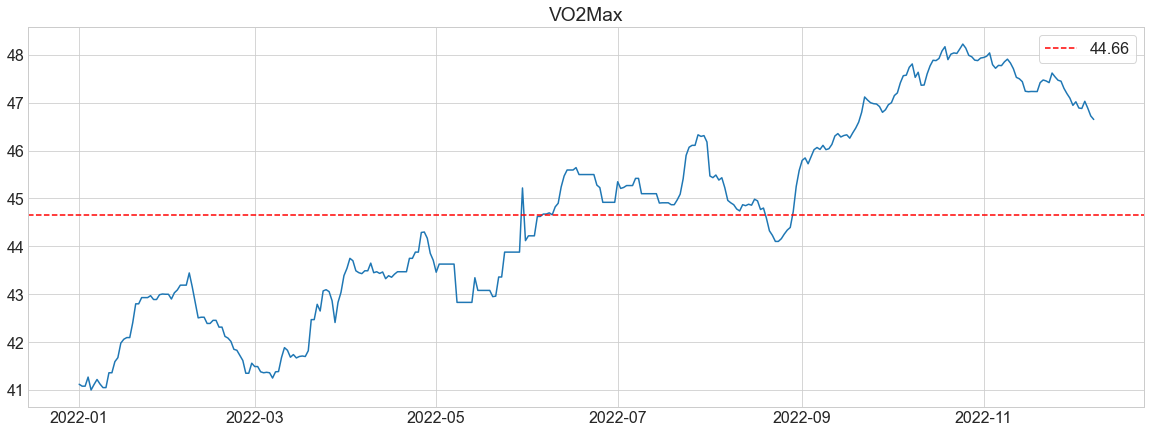

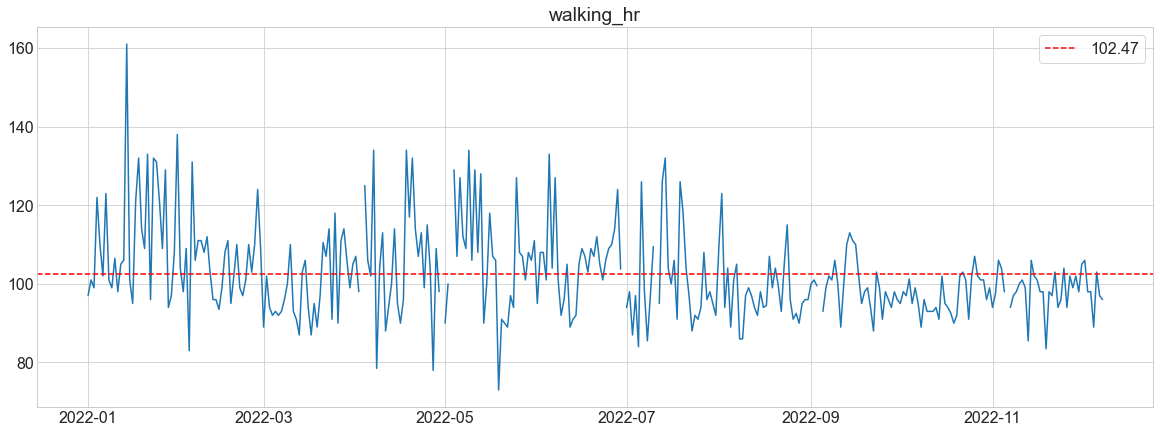

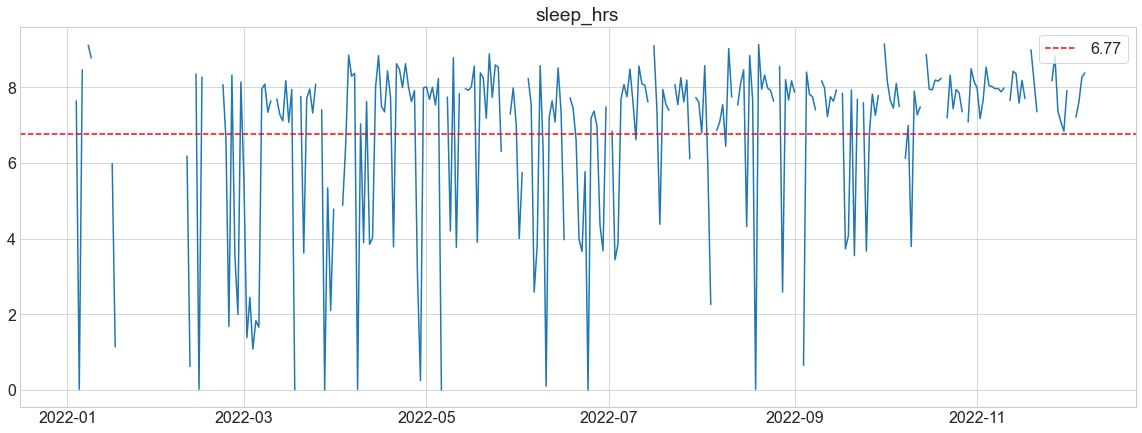

In [100]:
for col in daily_info.columns:
    plt.plot(daily_info['2022'][col])
    plt.title(f'{col}')
    mean = daily_info['2022'][col].mean()
    plt.axhline(mean, color = 'r', linestyle = '--', label=f'{round(mean,2)}')
    plt.legend(loc = 'upper right', frameon=True)
    plt.show()

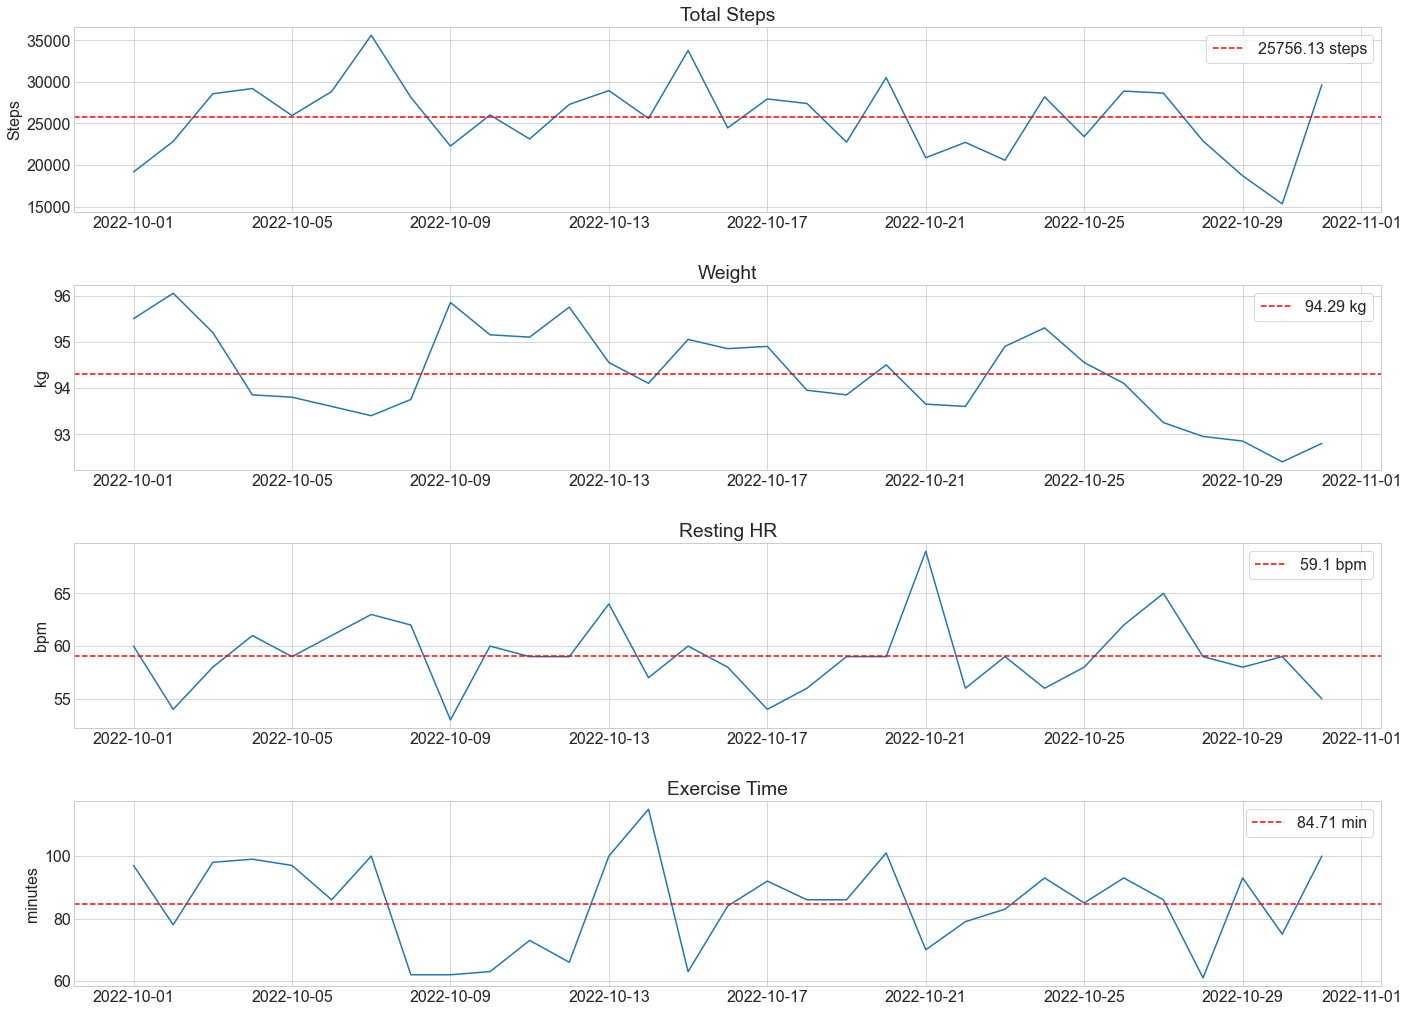

In [9]:
e.show_daily_viz(daily_info, year=2022, month=10)

In [10]:
VO2Max = records[records.activity_type=='VO2Max']

In [11]:
VO2Max['2022-11']

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time
date,,,,,,,,,,
2022-11-01,VO2Max,Mark的Apple Watch,2775.1.6,mL/min·kg,47.97,NaN,0,12:25,12:25,0 days
2022-11-01,VO2Max,Mark的Apple Watch,2775.1.6,mL/min·kg,47.92,NaN,0,05:54,05:54,0 days
2022-11-02,VO2Max,Mark的Apple Watch,2775.1.6,mL/min·kg,48.0,NaN,0,12:17,12:17,0 days
2022-11-02,VO2Max,Mark的Apple Watch,2775.1.6,mL/min·kg,47.94,NaN,0,05:46,05:46,0 days
2022-11-03,VO2Max,Mark的Apple Watch,2775.1.6,mL/min·kg,47.89,NaN,0,15:10,15:10,0 days
2022-11-03,VO2Max,Mark的Apple Watch,2775.1.6,mL/min·kg,48.1,NaN,0,05:51,05:51,0 days
2022-11-03,VO2Max,Mark的Apple Watch,2775.1.6,mL/min·kg,48.13,NaN,0,12:30,12:30,0 days
2022-11-04,VO2Max,Mark的Apple Watch,2780.0.16.1.4,mL/min·kg,47.72,NaN,0,12:19,12:19,0 days
2022-11-04,VO2Max,Mark的Apple Watch,2780.0.16.1.4,mL/min·kg,47.87,NaN,0,05:50,05:50,0 days


In [12]:
AppleStandTime = records[records.activity_type=='AppleStandTime']

In [13]:
AppleStandTime['2022-11'].resample('D').value.sum()

date
2022-11-01    173.0
2022-11-02    197.0
2022-11-03    199.0
2022-11-04    197.0
2022-11-05    261.0
2022-11-06    164.0
2022-11-07    165.0
2022-11-08    165.0
2022-11-09    172.0
2022-11-10    182.0
2022-11-11    213.0
2022-11-12    243.0
2022-11-13    161.0
2022-11-14    177.0
2022-11-15    186.0
2022-11-16    161.0
2022-11-17    171.0
2022-11-18    177.0
2022-11-19    173.0
2022-11-20    155.0
2022-11-21    190.0
2022-11-22    190.0
2022-11-23    181.0
2022-11-24    199.0
2022-11-25    170.0
2022-11-26    192.0
2022-11-27    158.0
2022-11-28    182.0
2022-11-29    189.0
2022-11-30    191.0
Freq: D, Name: value, dtype: object

In [14]:
sleep_info = records[records.activity_type=='SleepAnalysis']

In [15]:
inbed_time = sleep_info[sleep_info.value == 'HKCategoryValueSleepAnalysisInBed']

In [33]:
inbed_time.resample('d').total_time.sum()

date
2016-10-10   0 days 08:45:50
2016-10-11   0 days 04:48:56
2016-10-12   0 days 11:17:19
2016-10-13   0 days 08:12:36
2016-10-14   0 days 00:05:22
                   ...      
2022-12-03   0 days 00:00:00
2022-12-04   0 days 14:25:13
2022-12-05   0 days 07:36:12
2022-12-06   0 days 08:15:34
2022-12-07   0 days 08:22:50
Freq: D, Name: total_time, Length: 2250, dtype: timedelta64[ns]

In [18]:
w.in_bed_time(records)

,total_time
date,
2016-10-10,8.763889
2016-10-11,4.815556
2016-10-12,8.383056
2016-10-12,0.143333
2016-10-12,0.143333
...,...
2022-12-04,8.213056
2022-12-04,6.207222
2022-12-05,7.603333


In [19]:
records[records.activity_type=='VO2Max'].resample('d')[['value']].mean()

,value
date,
2021-11-01,45.490000
2021-11-02,43.850000
2021-11-03,43.370000
2021-11-04,NaN
2021-11-05,43.630000
...,...
2022-12-04,46.880000
2022-12-05,47.030000
2022-12-06,46.886667


In [31]:
records[records.activity_type=='DistanceWalkingRunning'].resample('d')[['value']].sum()

,value
date,
2015-10-10,3.524410
2015-10-11,9.079140
2015-10-12,10.154960
2015-10-13,7.531840
2015-10-14,6.156990
...,...
2022-12-04,14.567372
2022-12-05,21.517772
2022-12-06,23.098255


In [82]:
WalkingStepLength = records[records.activity_type=='WalkingStepLength']

In [84]:
WalkingStepLength['value'] = WalkingStepLength.value.astype(float)

<AxesSubplot:xlabel='date'>

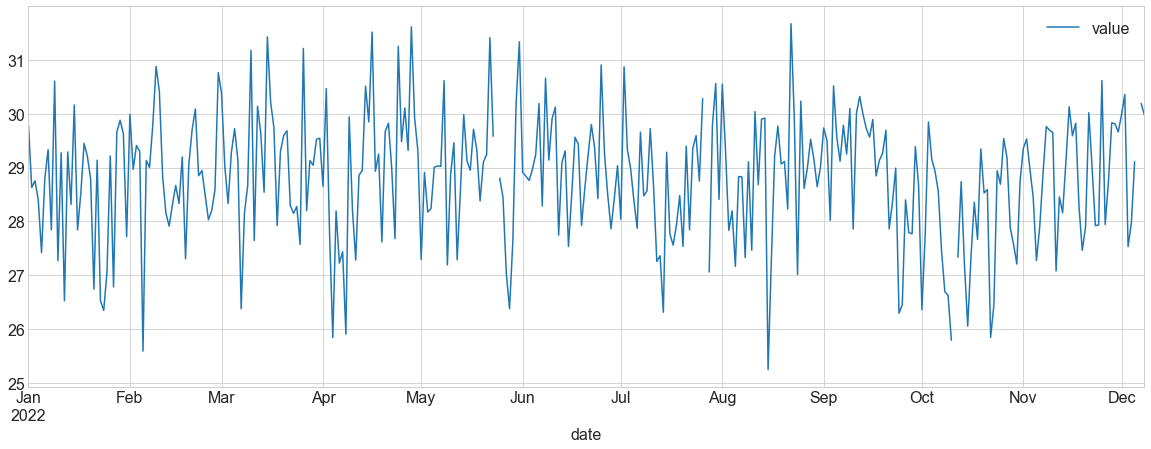

In [87]:
WalkingStepLength['2022'].resample('d')[['value']].mean().plot()

In [91]:
reload(w)

<module 'wrangle' from '/Users/fostermark/codeup-data-science/my_apple_health/wrangle.py'>

In [92]:
w.in_bed_time(records)

,total_time
date,
2016-10-10,8.76
2016-10-11,4.82
2016-10-12,11.29
2016-10-13,8.21
2016-10-14,0.09
...,...
2022-12-03,0.00
2022-12-04,14.42
2022-12-05,7.60
